# Importing the necessary library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('data_sets/breast-cancer-dataset.csv', index_col=False)

In [17]:
df.head()

,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,2019,40,1,2,0,Right,0,Upper inner,0,Benign
1,2019,39,1,2,0,Left,0,Upper outer,0,Benign
2,2019,45,0,4,0,Left,0,Lower outer,0,Benign
3,2019,26,1,3,0,Left,0,Lower inner,1,Benign
4,2019,21,1,1,0,Right,0,Upper outer,1,Benign


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              213 non-null    object
 1   Age               213 non-null    int64 
 2   Menopause         213 non-null    int64 
 3   Tumor Size (cm)   213 non-null    object
 4   Inv-Nodes         213 non-null    object
 5   Breast            213 non-null    object
 6   Metastasis        213 non-null    object
 7   Breast Quadrant   213 non-null    object
 8   History           213 non-null    object
 9   Diagnosis Result  213 non-null    object
dtypes: int64(2), object(8)
memory usage: 16.8+ KB


In [19]:
df.describe()

,Age,Menopause
count,213.000000,213.000000
mean,39.784038,0.666667
std,14.096712,0.472515
min,13.000000,0.000000
25%,30.000000,0.000000
50%,40.000000,1.000000
75%,49.000000,1.000000
max,77.000000,1.000000


In [20]:
df.isnull().sum()

Year                0
Age                 0
Menopause           0
Tumor Size (cm)     0
Inv-Nodes           0
Breast              0
Metastasis          0
Breast Quadrant     0
History             0
Diagnosis Result    0
dtype: int64

In [21]:
categorical_columns=df.select_dtypes(include=['category','object']).columns
numerical_columns=df.select_dtypes(exclude=['category','object']).columns

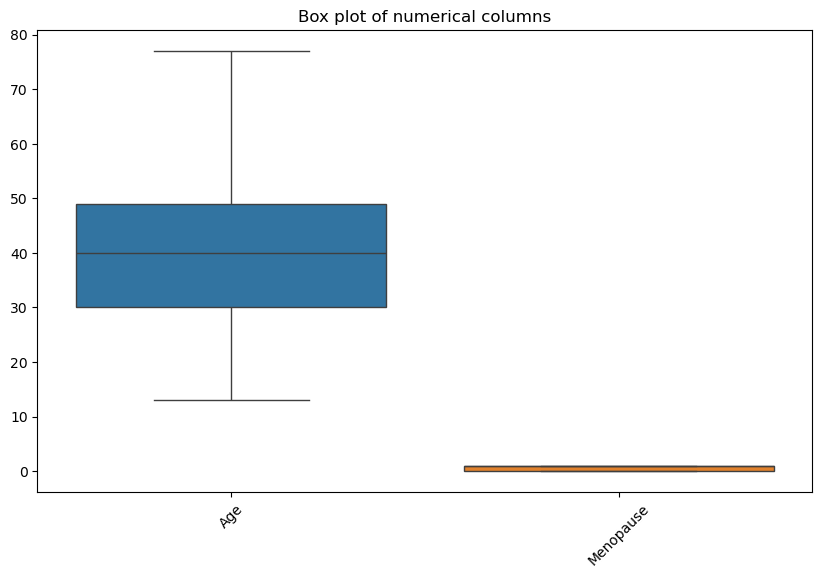

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numerical_columns])
plt.xticks(rotation=45)
plt.title('Box plot of numerical columns')
plt.show()

In [25]:
df[numerical_columns].head()

,Age,Menopause
0,40,1
1,39,1
2,45,0
3,26,1
4,21,1


In [26]:
df[categorical_columns].head()

,Year,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,2019,2,0,Right,0,Upper inner,0,Benign
1,2019,2,0,Left,0,Upper outer,0,Benign
2,2019,4,0,Left,0,Lower outer,0,Benign
3,2019,3,0,Left,0,Lower inner,1,Benign
4,2019,1,0,Right,0,Upper outer,1,Benign


In [27]:
import scipy.stats as stats

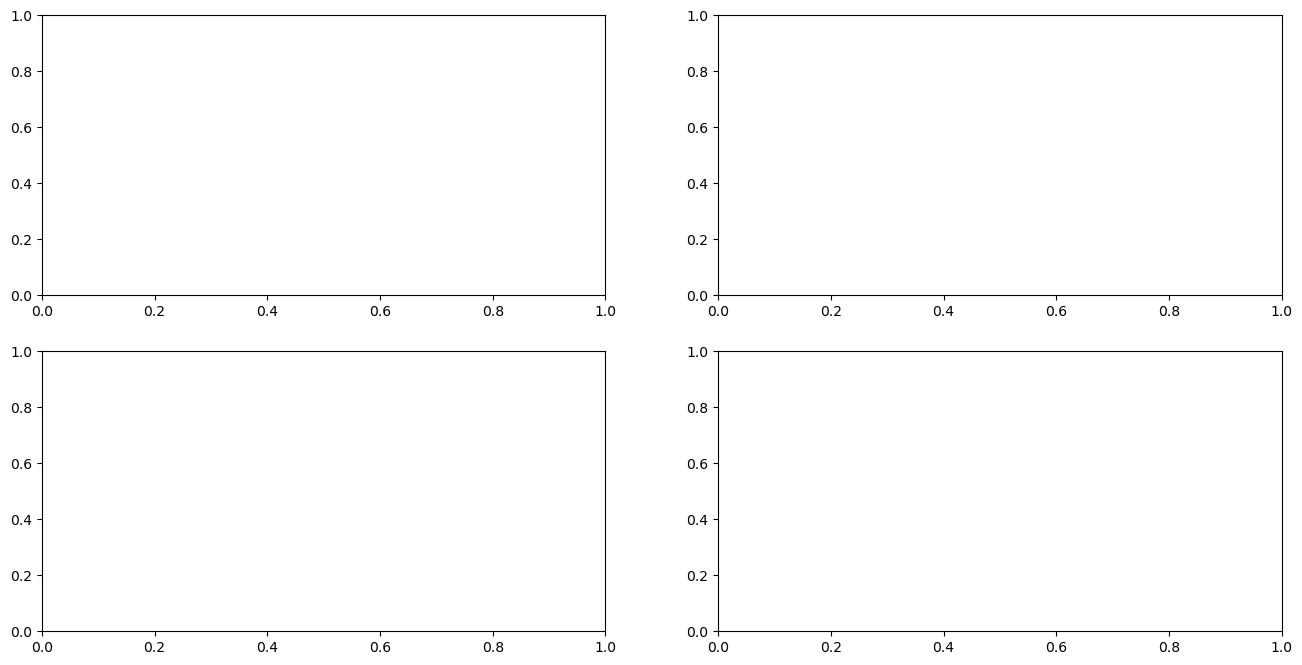

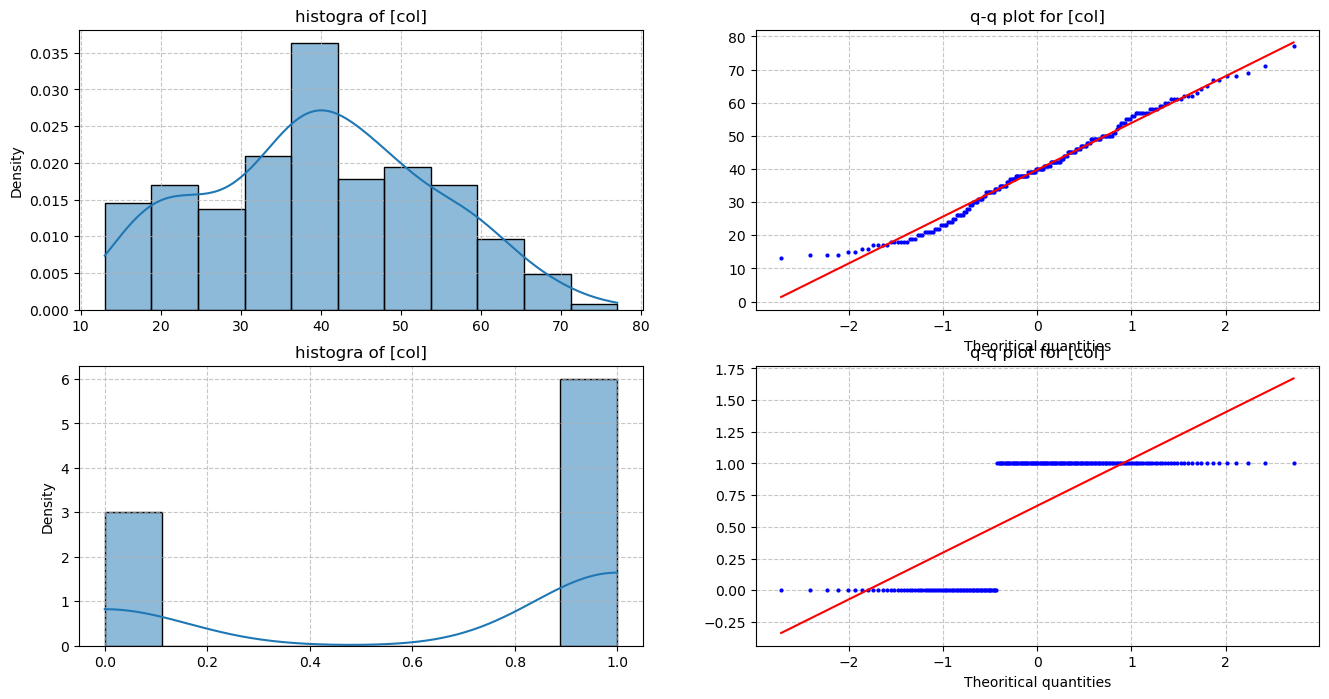

In [28]:
num_cols=len(numerical_columns)
fig, axes=plt.subplots(num_cols, 2, figsize=(16,num_cols * 4))
num_cols=len(numerical_columns)
fig, axes = plt.subplots(num_cols,2,figsize=(16, num_cols*4))

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col],kde = True, ax =axes[i,0],stat = 'density',linewidth=1)
    axes[i,0].set_title(f'histogra of [col]')
    axes[i,0].set_xlabel('')
    axes[i,0].set_ylabel('Density')
    axes[i,0].grid(True, linestyle='--',alpha=0.7)

    stats.probplot(df[col],plot=axes[i,1], dist ='norm', fit = True)
    axes[i,1].get_lines()[0].set_markersize(2.0)
    axes[i,1].grid(True, linestyle='--',alpha=0.7)
    axes[i,1].set_title(f'q-q plot for [col]')
    axes[i,1].set_xlabel('Theoritical quantities')
    axes[i,1].set_ylabel('')
    

In [29]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [30]:
import scipy.stats as stats
from scipy.stats import anderson , jarque_bera,shapiro,normaltest,kstest
from statsmodels.stats.diagnostic import lilliefors

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import anderson, jarque_bera, shapiro,normaltest,kstest
from statsmodels.stats.diagnostic import lilliefors  # Corrected import


# Function to perform normality tests
def test_normality(df, col):
    print(f'Column: {col}')
    
    # Shapiro-Wilk test
    stat_shapiro, p_shapiro = shapiro(df[col])
    print(f'Shapiro-Wilk Test: Statistics={stat_shapiro:.3f}, p-value={p_shapiro:.3f}')
    if p_shapiro > 0.05:
        print(f'Shapiro-Wilk Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Shapiro-Wilk Test: {col} does not look normally distributed (reject H0)')
    
    # Anderson-Darling test
    result_anderson = anderson(df[col])
    print(f'Anderson-Darling Test: Statistics={result_anderson.statistic:.3f}')
    print(f'Anderson-Darling Test: Critical Values: {result_anderson.critical_values}')
    if result_anderson.statistic < result_anderson.critical_values[2]:
        print(f'Anderson-Darling Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Anderson-Darling Test: {col} does not look normally distributed (reject H0)')
    
    # Jarque-Bera test
    jb_stat, p_val_jb = jarque_bera(df[col])
    print(f'Jarque-Bera Test: JB statistic={jb_stat:.3f}, p-value={p_val_jb:.3f}')
    if p_val_jb > 0.05:
        print(f'Jarque-Bera Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Jarque-Bera Test: {col} does not look normally distributed (reject H0)')


# D'Agostino and Pearson's test
    stat_agostino, p_agostino = normaltest(df[col])
    print(f"D'Agostino and Pearson's Test: Statistics={stat_agostino:.3f}, p-value={p_agostino:.3f}")
    if p_agostino > 0.05:
        print(f"D'Agostino and Pearson's Test: {col} looks normally distributed (fail to reject H0)")
    else:
        print(f"D'Agostino and Pearson's Test: {col} does not look normally distributed (reject H0)")
    
    # Kolmogorov-Smirnov test
    ks_stat, p_ks = kstest(df[col], 'norm')
    print(f'Kolmogorov-Smirnov Test: KS statistic={ks_stat:.3f}, p-value={p_ks:.3f}')
    if p_ks > 0.05:
        print(f'Kolmogorov-Smirnov Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Kolmogorov-Smirnov Test: {col} does not look normally distributed (reject H0)')
    
    # Lilliefors test
    stat_lilliefors, p_lilliefors = lilliefors(df[col])
    print(f'Lilliefors Test: Statistics={stat_lilliefors:.3f}, p-value={p_lilliefors:.3f}')
    if p_lilliefors > 0.05:
        print(f'Lilliefors Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Lilliefors Test: {col} does not look normally distributed (reject H0)')
    
    print('\n')


# Perform normality tests for each numerical column
for col in numerical_columns:
    test_normality(df, col)


Column: Age
Shapiro-Wilk Test: Statistics=0.983, p-value=0.011
Shapiro-Wilk Test: Age does not look normally distributed (reject H0)
Anderson-Darling Test: Statistics=0.750
Anderson-Darling Test: Critical Values: [0.566 0.644 0.773 0.902 1.072]
Anderson-Darling Test: Age looks normally distributed (fail to reject H0)
Jarque-Bera Test: JB statistic=4.040, p-value=0.133
Jarque-Bera Test: Age looks normally distributed (fail to reject H0)
D'Agostino and Pearson's Test: Statistics=7.783, p-value=0.020
D'Agostino and Pearson's Test: Age does not look normally distributed (reject H0)
Kolmogorov-Smirnov Test: KS statistic=1.000, p-value=0.000
Kolmogorov-Smirnov Test: Age does not look normally distributed (reject H0)
Lilliefors Test: Statistics=0.052, p-value=0.197
Lilliefors Test: Age looks normally distributed (fail to reject H0)


Column: Menopause
Shapiro-Wilk Test: Statistics=0.595, p-value=0.000
Shapiro-Wilk Test: Menopause does not look normally distributed (reject H0)
Anderson-Darling

In [32]:
def find_outliers_iqr(data):
    outliers_mask = pd.Series(index=data.columns, dtype=bool)

    for col in data.columns:
        if col in numerical_columns: #process only numerical columns
            Q1 = data[col].quantile(0.25)
            Q3=data[col].quantile(0.75)
            IQR=Q3-Q1
            lower_bound=Q1-1.5*IQR
            upper_bound=Q3 + 1.5*IQR
            col_outliers_mask = (data[col]<lower_bound) | (data[col] > upper_bound)
            outliers_mask[col]=col_outliers_mask.any() #true if any outliers detected
    return outliers_mask
        
outliers_iqr_mask =find_outliers_iqr(df)
print("Outliers detected using IQR method")
for col, is_outlier in outliers_iqr_mask.items():
    print(f"{col}:{is_outlier}")

Outliers detected using IQR method
Year:True
Age:False
Menopause:False
Tumor Size (cm):True
Inv-Nodes:True
Breast:True
Metastasis:True
Breast Quadrant:True
History:True
Diagnosis Result:True


In [33]:
def remove_outliers_iqr(data):
    cleaned_data = data.copy()

    for col in data.columns:
        if col in numerical_columns:  # Process only numerical columns
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]

    return cleaned_data

cleaned_data_iqr = remove_outliers_iqr(df)
print("DataFrame after removing outliers using IQR method:")
print(cleaned_data_iqr)

DataFrame after removing outliers using IQR method:
     Year  Age  Menopause Tumor Size (cm) Inv-Nodes Breast Metastasis  \
0    2019   40          1               2         0  Right          0   
1    2019   39          1               2         0   Left          0   
2    2019   45          0               4         0   Left          0   
3    2019   26          1               3         0   Left          0   
4    2019   21          1               1         0  Right          0   
..    ...  ...        ...             ...       ...    ...        ...   
208  2020   49          1               6         3  Right          1   
209  2020   28          1               3         0   Left          0   
210  2020   22          1               1         0   Left          0   
211  2020   19          1               1         0   Left          0   
212  2020   50          0               4         0  Right          0   

    Breast Quadrant History Diagnosis Result  
0       Upper inner     

In [34]:
numeric_data=df[numerical_columns]
# Compute pairwise correlation of numeric columns
correlation_matrix=numeric_data.corr()

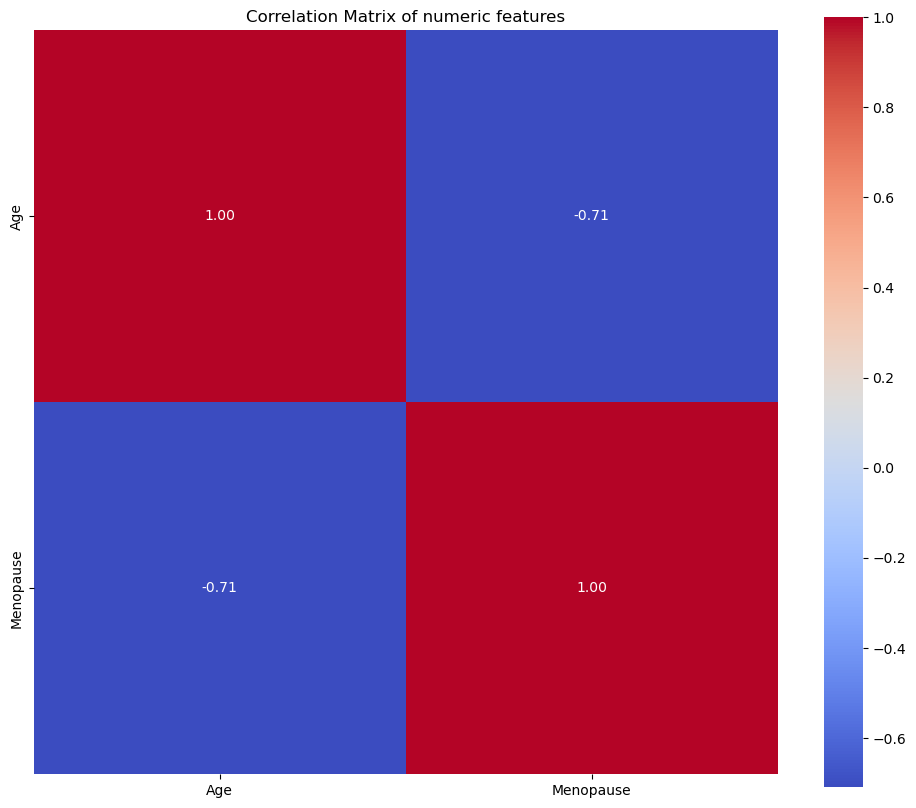

In [36]:
#plotting correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f",square=True)
plt.title('Correlation Matrix of numeric features')
plt.show()

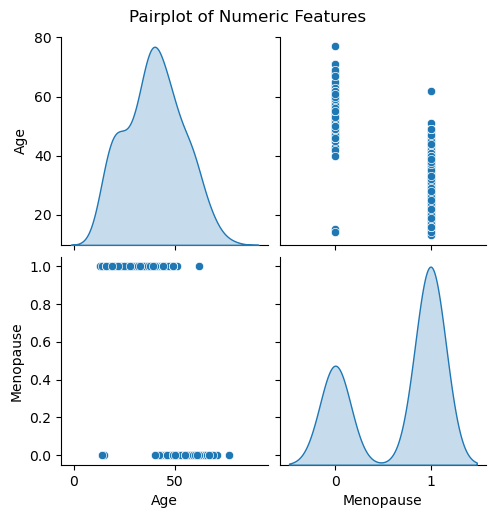

In [37]:
# Pairplot of numeric features
sns.pairplot(df[numerical_columns],diag_kind='kde')
plt.suptitle('Pairplot of Numeric Features',y=1.02)
plt.show()

In [39]:
def check_breast_cancer(diagnosis_result):
    if diagnosis_result == 'Malignant':
        return 'Has Breast Cancer'
    elif diagnosis_result == 'Benign':
        return 'No Breast Cancer'
    else: 
        return 'Unknown Diagnosis'

df['Breast Cancer Status']=df['Diagnosis Result'].apply(check_breast_cancer)
df[['Diagnosis Result','Breast Cancer Status']].head()

,Diagnosis Result,Breast Cancer Status
0,Benign,No Breast Cancer
1,Benign,No Breast Cancer
2,Benign,No Breast Cancer
3,Benign,No Breast Cancer
4,Benign,No Breast Cancer


In [43]:
df['Breast Cancer Status'].value_counts()

Breast Cancer Status
No Breast Cancer     120
Has Breast Cancer     93
Name: count, dtype: int64

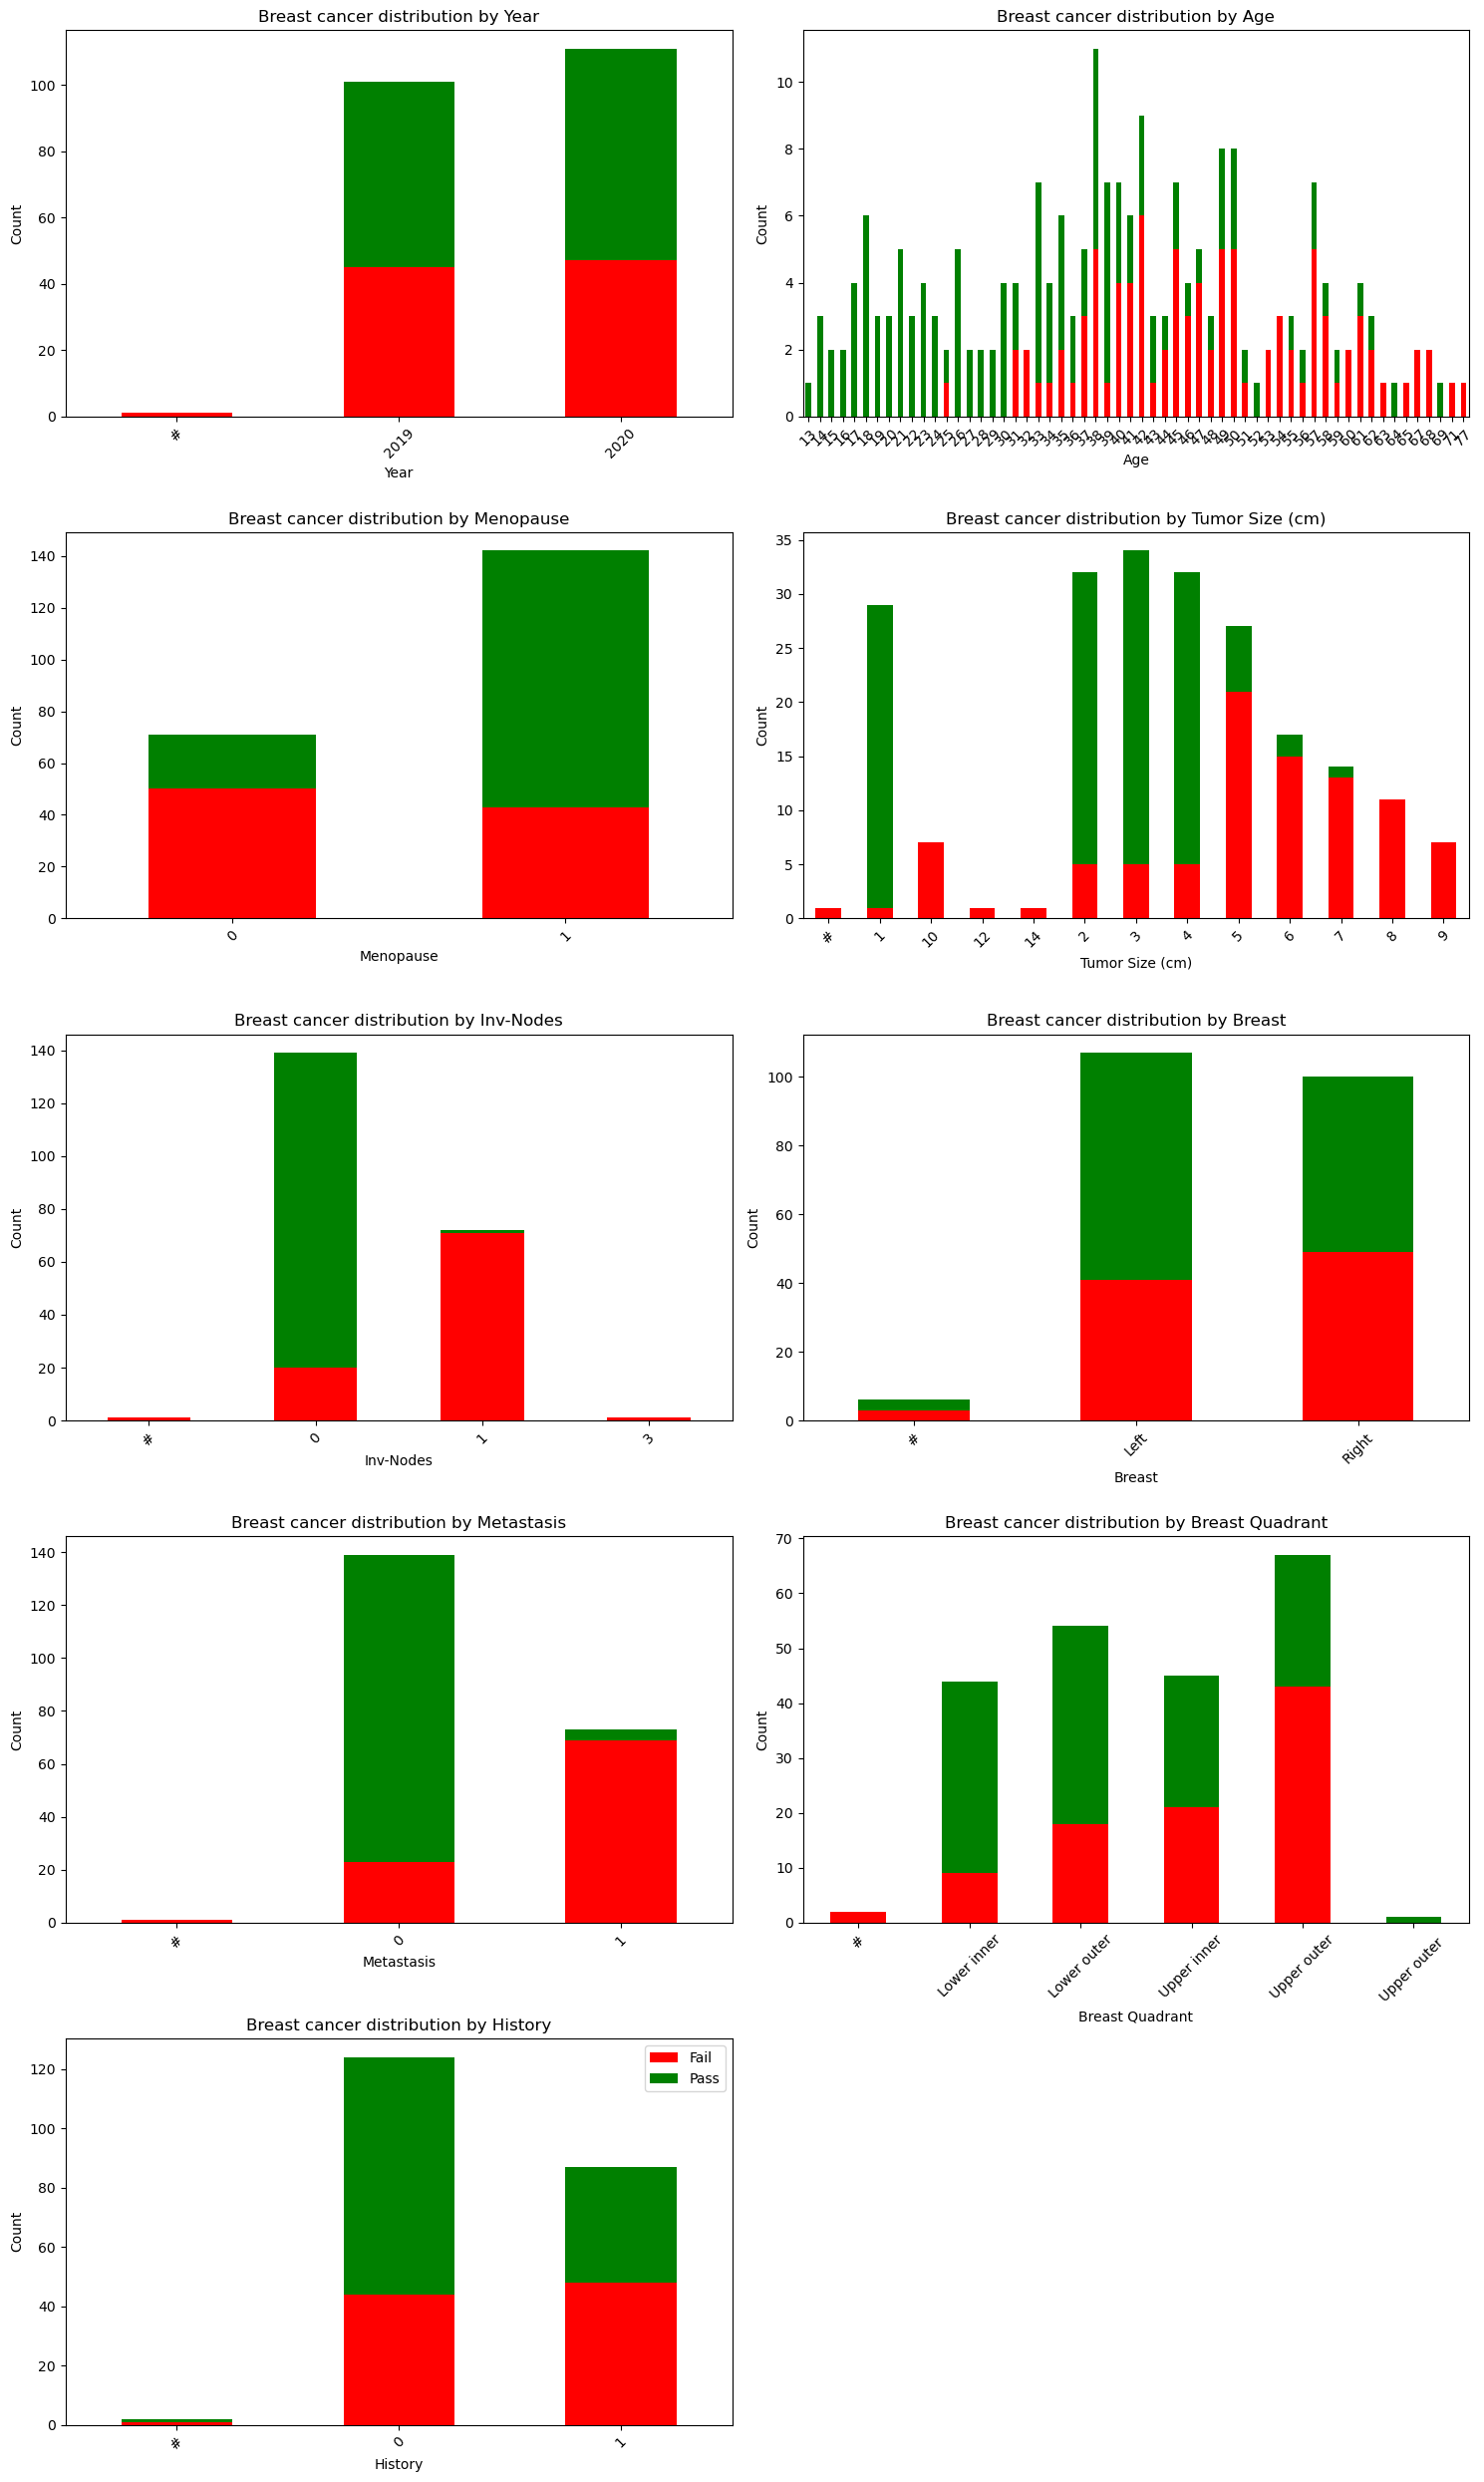

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df, pass/fail column, and GPA column are already defined as per your previous discussions

# Exclude columns that are not needed for plotting
columns_to_plot = [col for col in df.columns if col not in ['Diagnosis Result', 'Breast Cancer Status']]

# Calculate number of rows and columns for subplot grid
num_cols = 2  # Number of columns in subplot layout
num_rows = (len(columns_to_plot) + 1) // num_cols  # Calculate number of rows needed

# Adjust figure size based on number of subplots
fig_width = 15
fig_height = num_rows * 5  # Adjust height based on number of rows

plt.figure(figsize=(fig_width, fig_height))

# Iterate through each column and plot
for i, col in enumerate(columns_to_plot):
    plt.subplot(num_rows, num_cols, i + 1)
    pass_fail_cross = pd.crosstab(index=df[col], columns=df['Breast Cancer Status'])
    pass_fail_cross.plot(kind='bar', stacked=True, color=['red', 'green'], ax=plt.gca(), legend=None)
    plt.title(f'BREA distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(False)
    plt.tight_layout(pad=3.0)  # Adjust spacing between subplots

# Adjust layout and display the plot
plt.tight_layout()
plt.legend(['Fail', 'Pass'], loc='upper right')
plt.show() 

In [48]:
import pandas as pd
data=pd.read_csv('data_sets/breast-cancer-dataset.csv')
numerical_cols=data.select_dtypes(exclude=['category','object']).columns
category_cols=data.select_dtypes(include=['category','object']).columns
numerical_cols

Index(['Age', 'Menopause'], dtype='object')

In [49]:
category_cols

Index(['Year', 'Tumor Size (cm)', 'Inv-Nodes', 'Breast', 'Metastasis',
       'Breast Quadrant', 'History', 'Diagnosis Result'],
      dtype='object')

In [50]:
pd.set_option('display.max_columns',None) #
print("First few rows of data: ")
print(data.head())

First few rows of data: 
   Year  Age  Menopause Tumor Size (cm) Inv-Nodes Breast Metastasis  \
0  2019   40          1               2         0  Right          0   
1  2019   39          1               2         0   Left          0   
2  2019   45          0               4         0   Left          0   
3  2019   26          1               3         0   Left          0   
4  2019   21          1               1         0  Right          0   

  Breast Quadrant History Diagnosis Result  
0     Upper inner       0           Benign  
1     Upper outer       0           Benign  
2     Lower outer       0           Benign  
3     Lower inner       1           Benign  
4     Upper outer       1           Benign  


In [52]:
#Drop numerical columns from data
data_categorical=data.drop(columns=numerical_cols)
#Perform one-hot encoding on categorical columns
encoded_data=pd.get_dummies(data_categorical, columns=['Year', 'Tumor Size (cm)', 'Inv-Nodes', 'Breast', 'Metastasis',
       'Breast Quadrant', 'History', 'Diagnosis Result'])
encoded_data.head(100)

,Year_#,Year_2019,Year_2020,Tumor Size (cm)_#,Tumor Size (cm)_1,Tumor Size (cm)_10,Tumor Size (cm)_12,Tumor Size (cm)_14,Tumor Size (cm)_2,Tumor Size (cm)_3,Tumor Size (cm)_4,Tumor Size (cm)_5,Tumor Size (cm)_6,Tumor Size (cm)_7,Tumor Size (cm)_8,Tumor Size (cm)_9,Inv-Nodes_#,Inv-Nodes_0,Inv-Nodes_1,Inv-Nodes_3,Breast_#,Breast_Left,Breast_Right,Metastasis_#,Metastasis_0,Metastasis_1,Breast Quadrant_#,Breast Quadrant_Lower inner,Breast Quadrant_Lower outer,Breast Quadrant_Upper inner,Breast Quadrant_Upper outer,Breast Quadrant_Upper outer,History_#,History_0,History_1,Diagnosis Result_Benign,Diagnosis Result_Malignant
0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,True,False
1,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,True,False
2,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False
3,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True,True,False
4,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,True,False
96,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,True,False,True,False
97,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,True
98,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True,True,False


In [53]:
pip install Scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
#Assuming encoded_data is already created from one-hot encoding
#numerical-cols should be defined earlier as numerical columns from the dataset
#Pipeline for numerical columns
numerical_pipeline=Pipeline([('scaler',StandardScaler())])
#Transform numerical columns
numerical_data=numerical_pipeline.fit_transform(data[numerical_cols])
#Convert transformed numerical data back to Dataframe
numerical_data_df=pd.DataFrame(numerical_data,columns=numerical_cols)
#Combine numerical and categorical data
final_data = pd.concat([encoded_data, numerical_data_df], axis=1)
#Now final_data contains all your processed data ready for modeling

In [55]:
final_data.head()

,Year_#,Year_2019,Year_2020,Tumor Size (cm)_#,Tumor Size (cm)_1,Tumor Size (cm)_10,Tumor Size (cm)_12,Tumor Size (cm)_14,Tumor Size (cm)_2,Tumor Size (cm)_3,Tumor Size (cm)_4,Tumor Size (cm)_5,Tumor Size (cm)_6,Tumor Size (cm)_7,Tumor Size (cm)_8,Tumor Size (cm)_9,Inv-Nodes_#,Inv-Nodes_0,Inv-Nodes_1,Inv-Nodes_3,Breast_#,Breast_Left,Breast_Right,Metastasis_#,Metastasis_0,Metastasis_1,Breast Quadrant_#,Breast Quadrant_Lower inner,Breast Quadrant_Lower outer,Breast Quadrant_Upper inner,Breast Quadrant_Upper outer,Breast Quadrant_Upper outer,History_#,History_0,History_1,Diagnosis Result_Benign,Diagnosis Result_Malignant,Age,Menopause
0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,True,False,0.015356,0.707107
1,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,True,False,-0.055749,0.707107
2,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False,0.370884,-1.414214
3,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True,True,False,-0.980123,0.707107
4,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,True,False,-1.335651,0.707107
